In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import glob, os

Plotting and saving to png format from csv -- regular picoscope data no commentary

In [ ]:
###plotting and saving csvs into png format graphs
directory = r"C:\Users\kayli\Downloads\NaI_Test4_amplified_50Ohm-20241211T233731Z-001\NaI_Test4_amplified_50Ohm_csvs"
# data = pd.read_csv(r"C:\Users\kayli\OneDrive\Documents\COSI\picoscope_background_checks_50us_div-20241009T221601Z-001\picoscope_background_checks_50us_div\20240718_record_check (38).csv")
for file in os.listdir(directory):
    if file.endswith(".csv"):
        filename = os.path.join(file)
        print(filename)
        clean_data = pd.read_csv(directory+'/'+file, low_memory = False)
        clean_data = clean_data.iloc[1:]
        clean_data.replace([np.inf, -np.inf], np.nan, inplace=True)

        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('∞', np.nan)

        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('-∞', np.nan)

        clean_data['Time'] = clean_data['Time'].astype(float)
        clean_data['Channel A'] = clean_data['Channel A'].astype(float)

        
        print(os.path.join(file))
        
        plt.plot(clean_data['Time'], clean_data['Channel A'], label='Channel A (mV)',color = 'b')

        plt.ylim(-5, 5)

        # Adding labels and title
        plt.xlabel('Time (µs)')
        plt.ylabel('Channel A Signal (V)')
        plt.title('PicoScope Data:' + filename)

        #save as png
        save_path = os.path.join(directory, f"{os.path.splitext(file)[0]}.png")  # Save as PNG with the same name as CSV file
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(save_path, format='png')  # Save the plot to a PNG file
        plt.close()
        

Plotting and saving csvs into png format graphs with saturation duration analysis (for 50 Ohm but can be modified to work for all folders)

In [49]:
###plotting and saving csvs into png format graphs
directory = r"C:\Users\kayli\OneDrive\Documents\COSI\NaI_Test4.5_amplified_1MOhm-20241211T232400Z-001\NaI_Test4.5_amplified_1MOhm_csvs"
# data = pd.read_csv(r"C:\Users\kayli\OneDrive\Documents\COSI\picoscope_background_checks_50us_div-20241009T221601Z-001\picoscope_background_checks_50us_div\20240718_record_check (38).csv")
for file in os.listdir(directory):
    if file.endswith(".csv"):
        filename = os.path.join(file)
        print(filename)
        clean_data = pd.read_csv(directory+'/'+file, low_memory = False)
        clean_data = clean_data.iloc[1:]
        clean_data.replace([np.inf, -np.inf], np.nan, inplace=True)

        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('∞', np.nan)

        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('-∞', np.nan)

        clean_data['Time'] = clean_data['Time'].astype(float)
        clean_data['Channel A'] = clean_data['Channel A'].astype(float)

        
        signal = clean_data["Channel A"]
        time = clean_data["Time"]
        saturation_mask = signal < -1.4
        saturation_start = time[saturation_mask].iloc[0]
        saturation_end = time[saturation_mask].iloc[-1]
        saturation_duration = saturation_end - saturation_start

        # Find return to baseline (close to 0V after saturation)
        return_to_baseline_index = np.where(np.abs(signal[saturation_mask.idxmax():]) < 0.01)[0][0]  # Adjust threshold as needed
        return_to_baseline_time = time[return_to_baseline_index + saturation_mask.idxmax()]
        if (clean_data['Channel A'] < -1.4).any():
            # Plot for visualization
            plt.plot(time, signal, label="Signal")
            plt.plot(time,clean_data["Channel A"])
            print("peak voltage value", clean_data["Channel A"].min())
            plt.axvspan(saturation_start, saturation_end, color='red', alpha=0.3, label="Saturation")
            plt.axvline(return_to_baseline_time, color='green', linestyle='--', label="Return to Baseline")
            plt.xlabel("Time (µs)")
            plt.ylabel("Voltage (V)")
            plt.title('PicoScope Data:' + filename)
            plt.legend()

            #save as png
            save_path = os.path.join(directory, f"{os.path.splitext(file)[0]}.png")  # Save as PNG with the same name as CSV file
            plt.savefig(save_path, format='png')  # Save the plot to a PNG file
            plt.close()
        

20241121_NaI_amplified_closertobeam_wo50Ohm (10).csv
peak voltage value -1.525926
20241121_NaI_amplified_closertobeam_wo50Ohm (100).csv
peak voltage value -1.527085
20241121_NaI_amplified_closertobeam_wo50Ohm (101).csv


IndexError: single positional indexer is out-of-bounds

Result 1: Saturation Duration vs Return to Baseline Graph for 50 Ohm impedance

In [50]:
### 50 ohm data saturation voltage was -.6 V for this data??
satdurationlist = []
returnbaselinelist = []
outliers = []
directory = r"C:\Users\kayli\Downloads\NaI_Test4_amplified_50Ohm-20241211T233731Z-001\NaI_Test4_amplified_50Ohm_csvs"
# data = pd.read_csv(r"C:\Users\kayli\OneDrive\Documents\COSI\picoscope_background_checks_50us_div-20241009T221601Z-001\picoscope_background_checks_50us_div\20240718_record_check (38).csv")
for file in os.listdir(directory):
    if file.endswith(".csv"):
        filename = os.path.join(file)
        data = pd.read_csv(directory+'/'+file, low_memory = False)
        data = data.iloc[1:]
        data.replace([np.inf, -np.inf], np.nan, inplace=True)

        clean_data = data   
        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('∞', np.nan)

        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('-∞', np.nan)

        clean_data['Time'] = clean_data['Time'].astype(float)
        clean_data['Channel A'] = clean_data['Channel A'].astype(float)

        # print(os.path.join(file))
        #checking to see if there is a jump
        if (clean_data['Channel A'] < -.6).any():
            # print(filename, "has a saturation event")

            signal = clean_data["Channel A"]
            time = clean_data["Time"]
            saturation_mask = signal < -.6
            saturation_start = time[saturation_mask].iloc[0]
            saturation_end = time[saturation_mask].iloc[-1]
            saturation_duration = saturation_end - saturation_start

            # Find return to baseline (close to 0V after saturation)
            return_to_baseline_index = np.where(np.abs(signal[saturation_mask.idxmax():]) < 0.01)[0][0]  # Adjust threshold as needed
            return_to_baseline_time = time[return_to_baseline_index + saturation_mask.idxmax()]

            if saturation_duration <200:
                satdurationlist.append(saturation_duration)
                returnbaselinelist.append(return_to_baseline_time-saturation_end)
                if (saturation_duration > 15):
                    print(filename)
                    
            
number = len(satdurationlist)
print( "datapoints plotted", number)
plt.scatter(satdurationlist, returnbaselinelist)

plt.ylabel("Time to return to Baseline ($\mu$ s)")
plt.xlabel("Saturation Duration ($\mu$ s)")
plt.title("November NaI Test 50 $\Omega$ Impedance")

<>:51: SyntaxWarning: invalid escape sequence '\m'
<>:52: SyntaxWarning: invalid escape sequence '\m'
<>:53: SyntaxWarning: invalid escape sequence '\O'
<>:51: SyntaxWarning: invalid escape sequence '\m'
<>:52: SyntaxWarning: invalid escape sequence '\m'
<>:53: SyntaxWarning: invalid escape sequence '\O'
C:\Users\kayli\AppData\Local\Temp\ipykernel_8728\761921148.py:51: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Time to return to Baseline ($\mu$ s)")
C:\Users\kayli\AppData\Local\Temp\ipykernel_8728\761921148.py:52: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Saturation Duration ($\mu$ s)")
C:\Users\kayli\AppData\Local\Temp\ipykernel_8728\761921148.py:53: SyntaxWarning: invalid escape sequence '\O'
  plt.title("November NaI Test 50 $\Omega$ Impedance")
C:\Users\kayli\AppData\Local\Temp\ipykernel_8728\761921148.py:51: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Time to return to Baseline ($\mu$ s)")
C:\Users\kayli\AppData\Local\Temp\ipykernel_872

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\kayli\\Downloads\\NaI_Test4_amplified_50Ohm-20241211T233731Z-001\\NaI_Test4_amplified_50Ohm_csvs'

Result 1: Saturation Duration vs Return to Baseline Graph for 10kOhm impedance

<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\O'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\O'
C:\Users\kayli\AppData\Local\Temp\ipykernel_8728\2412775583.py:44: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Time to return to Baseline ($\mu$ s)")
C:\Users\kayli\AppData\Local\Temp\ipykernel_8728\2412775583.py:45: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Saturation Duration ($\mu$ s)")
C:\Users\kayli\AppData\Local\Temp\ipykernel_8728\2412775583.py:46: SyntaxWarning: invalid escape sequence '\O'
  plt.title("November NaI Test 10 k$\Omega$ Impedance")


20241121_NaI_Test5_10kOhm (122).csv
20241121_NaI_Test5_10kOhm (148).csv
20241121_NaI_Test5_10kOhm (176).csv
20241121_NaI_Test5_10kOhm (54).csv


Text(0.5, 1.0, 'November NaI Test 10 k$\\Omega$ Impedance')

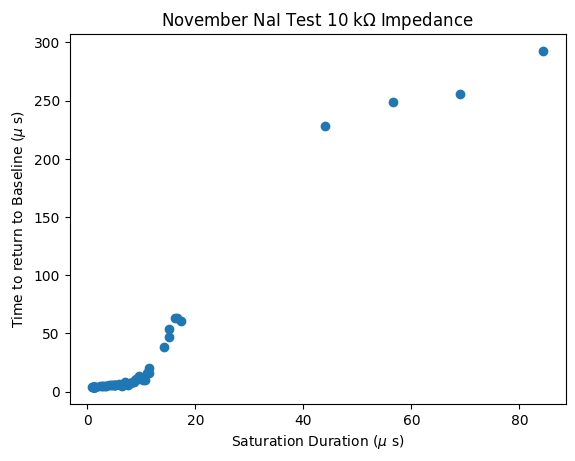

In [41]:

satdurationlist3 = []
returnbaselinelist3 = []
directory = r"C:\Users\kayli\OneDrive\Documents\COSI\NaI_Test5_amplified_10kOhm-20241202T234251Z-001\NaI_Test5_amplified_10kOhm_csvs"
# data = pd.read_csv(r"C:\Users\kayli\OneDrive\Documents\COSI\picoscope_background_checks_50us_div-20241009T221601Z-001\picoscope_background_checks_50us_div\20240718_record_check (38).csv")
for file in os.listdir(directory):
    if file.endswith(".csv"):
        filename = os.path.join(file)
        data = pd.read_csv(directory+'/'+file, low_memory = False)
        data = data.iloc[1:]
        data.replace([np.inf, -np.inf], np.nan, inplace=True)

        clean_data = data   
        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('∞', np.nan)

        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('-∞', np.nan)

        clean_data['Time'] = clean_data['Time'].astype(float)
        clean_data['Channel A'] = clean_data['Channel A'].astype(float)

        # print(os.path.join(file))
        #checking to see if there is a jump
        if (clean_data['Channel A'] < -.6).any():
            # print(filename, "has a saturation event")

            signal1 = clean_data["Channel A"]
            time1 = clean_data["Time"]
            saturation_mask1 = signal1 < -.6
            saturation_start1 = time[saturation_mask1].iloc[0]
            saturation_end1 = time[saturation_mask1].iloc[-1]
            saturation_duration1 = saturation_end1 - saturation_start1

            # Find return to baseline (close to 0V after saturation)
            return_to_baseline_index = np.where(np.abs(signal1[saturation_mask1.idxmax():]) < 0.01)[0][0]  # Adjust threshold as needed
            return_to_baseline_time = time[return_to_baseline_index + saturation_mask1.idxmax()]

            if saturation_duration1 <200:
                satdurationlist3.append(saturation_duration1)
                returnbaselinelist3.append(return_to_baseline_time-saturation_end1)
                if saturation_duration1 >40:
                    print(filename)
plt.scatter(satdurationlist3, returnbaselinelist3,  label="10 kΩ Dataset")
plt.ylabel("Time to return to Baseline ($\mu$ s)")
plt.xlabel("Saturation Duration ($\mu$ s)")
plt.title("November NaI Test 10 k$\Omega$ Impedance")

Result 1: Saturation Duration vs Return to Baseline Graph for 1MOhm impedance

<>:50: SyntaxWarning: invalid escape sequence '\m'
<>:51: SyntaxWarning: invalid escape sequence '\m'
<>:52: SyntaxWarning: invalid escape sequence '\O'
<>:50: SyntaxWarning: invalid escape sequence '\m'
<>:51: SyntaxWarning: invalid escape sequence '\m'
<>:52: SyntaxWarning: invalid escape sequence '\O'
C:\Users\kayli\AppData\Local\Temp\ipykernel_8728\1655970350.py:50: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Time to return to Baseline ($\mu$ s)")
C:\Users\kayli\AppData\Local\Temp\ipykernel_8728\1655970350.py:51: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Saturation Duration ($\mu$ s)")
C:\Users\kayli\AppData\Local\Temp\ipykernel_8728\1655970350.py:52: SyntaxWarning: invalid escape sequence '\O'
  plt.title("November NaI Test 1 M$\Omega$ Impedance")


20241121_NaI_amplified_closertobeam_wo50Ohm (26).csv
20241121_NaI_amplified_closertobeam_wo50Ohm (62).csv
datapoints plotted 64


Text(0.5, 1.0, 'November NaI Test 1 M$\\Omega$ Impedance')

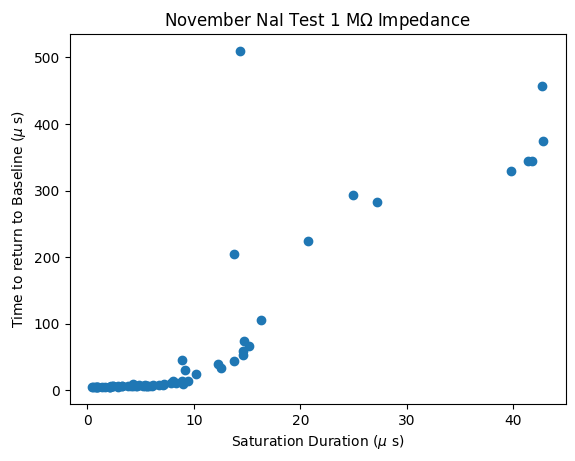

In [46]:
### 1 M ohm data
satdurationlist = []
returnbaselinelist = []
outliers = []
directory = r"C:\Users\kayli\OneDrive\Documents\COSI\NaI_Test4.5_amplified_1MOhm-20241211T232400Z-001\NaI_Test4.5_amplified_1MOhm_csvs"
# data = pd.read_csv(r"C:\Users\kayli\OneDrive\Documents\COSI\picoscope_background_checks_50us_div-20241009T221601Z-001\picoscope_background_checks_50us_div\20240718_record_check (38).csv")
for file in os.listdir(directory):
    if file.endswith(".csv"):
        filename = os.path.join(file)
        data = pd.read_csv(directory+'/'+file, low_memory = False)
        data = data.iloc[1:]
        data.replace([np.inf, -np.inf], np.nan, inplace=True)

        clean_data = data   
        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('∞', np.nan)

        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('-∞', np.nan)

        clean_data['Time'] = clean_data['Time'].astype(float)
        clean_data['Channel A'] = clean_data['Channel A'].astype(float)

        # print(os.path.join(file))
        #checking to see if there is a jump
        if (clean_data['Channel A'] < -1.49).any():
            # print(filename, "has a saturation event")

            signal = clean_data["Channel A"]
            time = clean_data["Time"]
            saturation_mask = signal < -1.4
            saturation_start = time[saturation_mask].iloc[0]
            saturation_end = time[saturation_mask].iloc[-1]
            saturation_duration = saturation_end - saturation_start

            # Find return to baseline (close to 0V after saturation)
            return_to_baseline_index = np.where(np.abs(signal[saturation_mask.idxmax():]) < 0.01)[0][0]  # Adjust threshold as needed
            return_to_baseline_time = time[return_to_baseline_index + saturation_mask.idxmax()]

            
            if saturation_duration <100:
                satdurationlist.append(saturation_duration)
                returnbaselinelist.append(return_to_baseline_time-saturation_end)
                if (return_to_baseline_time-saturation_end) > 450:
                    print(filename)
            
number = len(satdurationlist)
print( "datapoints plotted", number)
plt.scatter(satdurationlist, returnbaselinelist)
plt.ylabel("Time to return to Baseline ($\mu$ s)")
plt.xlabel("Saturation Duration ($\mu$ s)")
plt.title("November NaI Test 1 M$\Omega$ Impedance")


Result 1 All: 50 Ohm, 10k Ohm, 1 Mohm impedance all on one graph

<>:128: SyntaxWarning: invalid escape sequence '\m'
<>:129: SyntaxWarning: invalid escape sequence '\m'
<>:128: SyntaxWarning: invalid escape sequence '\m'
<>:129: SyntaxWarning: invalid escape sequence '\m'
C:\Users\kayli\AppData\Local\Temp\ipykernel_8728\3150834731.py:128: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Time to return to Baseline ($\mu$ s)")
C:\Users\kayli\AppData\Local\Temp\ipykernel_8728\3150834731.py:129: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Saturation Duration ($\mu$ s)")


20241121_NaI_amplified_closertobeam_wo50Ohm (10).csv has a saturation event
20241121_NaI_amplified_closertobeam_wo50Ohm (100).csv has a saturation event
20241121_NaI_amplified_closertobeam_wo50Ohm (102).csv has a saturation event
20241121_NaI_amplified_closertobeam_wo50Ohm (105).csv has a saturation event
20241121_NaI_amplified_closertobeam_wo50Ohm (109).csv has a saturation event
20241121_NaI_amplified_closertobeam_wo50Ohm (11).csv has a saturation event
20241121_NaI_amplified_closertobeam_wo50Ohm (110).csv has a saturation event
20241121_NaI_amplified_closertobeam_wo50Ohm (111).csv has a saturation event
20241121_NaI_amplified_closertobeam_wo50Ohm (113).csv has a saturation event
20241121_NaI_amplified_closertobeam_wo50Ohm (116).csv has a saturation event
20241121_NaI_amplified_closertobeam_wo50Ohm (118).csv has a saturation event
20241121_NaI_amplified_closertobeam_wo50Ohm (12).csv has a saturation event
20241121_NaI_amplified_closertobeam_wo50Ohm (121).csv has a saturation event
20

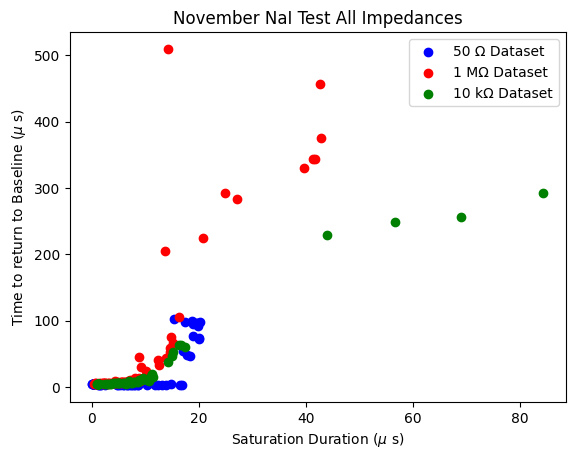

In [42]:
### 50 ohm data saturation voltage was -.6 V for this data??
satdurationlist = []
returnbaselinelist = []
directory = r"C:\Users\kayli\OneDrive\Documents\COSI\NaI_Test4_amplified_50Ohm-20241211T233731Z-001\NaI_Test4_amplified_50Ohm_csvs"
# data = pd.read_csv(r"C:\Users\kayli\OneDrive\Documents\COSI\picoscope_background_checks_50us_div-20241009T221601Z-001\picoscope_background_checks_50us_div\20240718_record_check (38).csv")
for file in os.listdir(directory):
    if file.endswith(".csv"):
        filename = os.path.join(file)
        data = pd.read_csv(directory+'/'+file, low_memory = False)
        data = data.iloc[1:]
        data.replace([np.inf, -np.inf], np.nan, inplace=True)

        clean_data = data   
        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('∞', np.nan)

        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('-∞', np.nan)

        clean_data['Time'] = clean_data['Time'].astype(float)
        clean_data['Channel A'] = clean_data['Channel A'].astype(float)

        # print(os.path.join(file))
        #checking to see if there is a jump
        if (clean_data['Channel A'] < -.6).any():
            # print(filename, "has a saturation event")

            signal = clean_data["Channel A"]
            time = clean_data["Time"]
            saturation_mask = signal < -.6
            saturation_start = time[saturation_mask].iloc[0]
            saturation_end = time[saturation_mask].iloc[-1]
            saturation_duration = saturation_end - saturation_start

            # Find return to baseline (close to 0V after saturation)
            return_to_baseline_index = np.where(np.abs(signal[saturation_mask.idxmax():]) < 0.01)[0][0]  # Adjust threshold as needed
            return_to_baseline_time = time[return_to_baseline_index + saturation_mask.idxmax()]

            if saturation_duration <200:
                satdurationlist.append(saturation_duration)
                returnbaselinelist.append(return_to_baseline_time-saturation_end)
plt.scatter(satdurationlist, returnbaselinelist, color='blue', label="50 Ω Dataset")
satdurationlist2 = []
returnbaselinelist2 = []
directory = r"C:\Users\kayli\OneDrive\Documents\COSI\NaI_Test4.5_amplified_1MOhm-20241211T232400Z-001\NaI_Test4.5_amplified_1MOhm_csvs"
# data = pd.read_csv(r"C:\Users\kayli\OneDrive\Documents\COSI\picoscope_background_checks_50us_div-20241009T221601Z-001\picoscope_background_checks_50us_div\20240718_record_check (38).csv")
for file in os.listdir(directory):
    if file.endswith(".csv"):
        filename = os.path.join(file)
        data = pd.read_csv(directory+'/'+file, low_memory = False)
        data = data.iloc[1:]
        data.replace([np.inf, -np.inf], np.nan, inplace=True)

        clean_data = data   
        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('∞', np.nan)

        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('-∞', np.nan)

        clean_data['Time'] = clean_data['Time'].astype(float)
        clean_data['Channel A'] = clean_data['Channel A'].astype(float)

        # print(os.path.join(file))
        #checking to see if there is a jump
        if (clean_data['Channel A'] < -1.49).any():
            print(filename, "has a saturation event")

            signal = clean_data["Channel A"]
            time = clean_data["Time"]
            saturation_mask = signal < -1.4
            saturation_start = time[saturation_mask].iloc[0]
            saturation_end = time[saturation_mask].iloc[-1]
            saturation_duration = saturation_end - saturation_start

            # Find return to baseline (close to 0V after saturation)
            return_to_baseline_index = np.where(np.abs(signal[saturation_mask.idxmax():]) < 0.01)[0][0]  # Adjust threshold as needed
            return_to_baseline_time = time[return_to_baseline_index + saturation_mask.idxmax()]

            
            if saturation_duration <100:
                satdurationlist2.append(saturation_duration)
                returnbaselinelist2.append(return_to_baseline_time-saturation_end)               
            
plt.scatter(satdurationlist2, returnbaselinelist2, color='red', label="1 MΩ Dataset")
satdurationlist3 = []
returnbaselinelist3 = []
directory = r"C:\Users\kayli\OneDrive\Documents\COSI\NaI_Test5_amplified_10kOhm-20241202T234251Z-001\NaI_Test5_amplified_10kOhm_csvs"
# data = pd.read_csv(r"C:\Users\kayli\OneDrive\Documents\COSI\picoscope_background_checks_50us_div-20241009T221601Z-001\picoscope_background_checks_50us_div\20240718_record_check (38).csv")
for file in os.listdir(directory):
    if file.endswith(".csv"):
        filename = os.path.join(file)
        data = pd.read_csv(directory+'/'+file, low_memory = False)
        data = data.iloc[1:]
        data.replace([np.inf, -np.inf], np.nan, inplace=True)

        clean_data = data   
        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('∞', np.nan)

        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('-∞', np.nan)

        clean_data['Time'] = clean_data['Time'].astype(float)
        clean_data['Channel A'] = clean_data['Channel A'].astype(float)

        # print(os.path.join(file))
        #checking to see if there is a jump
        if (clean_data['Channel A'] < -.6).any():
            # print(filename, "has a saturation event")

            signal = clean_data["Channel A"]
            time = clean_data["Time"]
            saturation_mask = signal < -.6
            saturation_start = time[saturation_mask].iloc[0]
            saturation_end = time[saturation_mask].iloc[-1]
            saturation_duration = saturation_end - saturation_start

            # Find return to baseline (close to 0V after saturation)
            return_to_baseline_index = np.where(np.abs(signal[saturation_mask.idxmax():]) < 0.01)[0][0]  # Adjust threshold as needed
            return_to_baseline_time = time[return_to_baseline_index + saturation_mask.idxmax()]

            if saturation_duration <200:
                satdurationlist3.append(saturation_duration)
                returnbaselinelist3.append(return_to_baseline_time-saturation_end)
plt.scatter(satdurationlist3, returnbaselinelist3, color='green', label="10 kΩ Dataset")

plt.ylabel("Time to return to Baseline ($\mu$ s)")
plt.xlabel("Saturation Duration ($\mu$ s)")
plt.legend()
plt.title("November NaI Test All Impedances")
plt.show()

Result 2: direct output vs saturation duration graph

In [ ]:
satdurationlist = []
returnbaselinelist = []
outliers = []
directory = r"C:\Users\kayli\OneDrive\Documents\NaI_Test7_two_outputs_direct-20241205T014640Z-001\NaI_Test7_two_outputs_direct_csvs"
# data = pd.read_csv(r"C:\Users\kayli\OneDrive\Documents\COSI\picoscope_background_checks_50us_div-20241009T221601Z-001\picoscope_background_checks_50us_div\20240718_record_check (38).csv")
for file in os.listdir(directory):
    if file.endswith(".csv"):
        filename = os.path.join(file)
        data = pd.read_csv(directory+'/'+file, low_memory = False)
        data = data.iloc[1:]
        data.replace([np.inf, -np.inf], np.nan, inplace=True)

        clean_data = data   
        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('∞', np.nan)

        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('-∞', np.nan)

        clean_data['Time'] = clean_data['Time'].astype(float)
        clean_data['Channel A'] = clean_data['Channel A'].astype(float)

        # print(os.path.join(file))
        #checking to see if there is a jump
        if (clean_data['Channel A'] < -1.49).any():
            print(filename, "has a saturation event")

            signal = clean_data["Channel A"]
            time = clean_data["Time"]
            saturation_mask = signal < -1.4
            saturation_start = time[saturation_mask].iloc[0]
            saturation_end = time[saturation_mask].iloc[-1]
            saturation_duration = saturation_end - saturation_start

            # Find return to baseline (close to 0V after saturation)
            return_to_baseline_index = np.where(np.abs(signal[saturation_mask.idxmax():]) < 0.01)[0][0]  # Adjust threshold as needed
            return_to_baseline_time = time[return_to_baseline_index + saturation_mask.idxmax()]

            satdurationlist.append(saturation_duration)
            returnbaselinelist.append(-return_to_baseline_time+saturation_end)
            if saturation_duration > 20:
                print(filename, "is the outlier")
                outliers.append(filename)
                
            # print(f"Saturation Duration: {saturation_duration} µs")
            # print(f"Return to Baseline Time: {return_to_baseline_time - saturation_end} µs")

            # # Plot for visualization
            # plt.plot(time, signal, label="Signal")
            # plt.axvspan(saturation_start, saturation_end, color='red', alpha=0.3, label="Saturation")
            # plt.axvline(return_to_baseline_time, color='green', linestyle='--', label="Return to Baseline")
            # plt.xlabel("Time (µs)")
            # plt.ylabel("Voltage (V)")
            # plt.legend()

            # #save as png
            # save_path = os.path.join(directory, f"{os.path.splitext(file)[0]})analyzed.png")  # Save as PNG with the same name as CSV file
            # plt.grid(True)
            # plt.tight_layout()
            # plt.savefig(save_path, format='png')  # Save the plot to a PNG file
            # plt.close()

plt.scatter(satdurationlist, returnbaselinelist)
plt.ylabel("Time to return to Baseline ($\mu$ s)")
plt.xlabel("Saturation Duration ($\mu$ s)")
plt.title("November NaI Test Direct Output")


number = len(satdurationlist)
print("data points", number)


<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:49: SyntaxWarning: invalid escape sequence '\m'
C:\Users\kayli\AppData\Local\Temp\ipykernel_8728\1413032742.py:49: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("Saturation Duration ($\mu$ s)")


202411_NaI_Direct_output (10).csv has a saturation event
202411_NaI_Direct_output (102).csv has a saturation event
202411_NaI_Direct_output (105).csv has a saturation event
202411_NaI_Direct_output (108).csv has a saturation event
202411_NaI_Direct_output (111).csv has a saturation event
202411_NaI_Direct_output (115).csv has a saturation event
202411_NaI_Direct_output (116).csv has a saturation event
202411_NaI_Direct_output (117).csv has a saturation event
202411_NaI_Direct_output (119).csv has a saturation event
202411_NaI_Direct_output (123).csv has a saturation event
202411_NaI_Direct_output (126).csv has a saturation event
202411_NaI_Direct_output (129).csv has a saturation event
202411_NaI_Direct_output (13).csv has a saturation event
202411_NaI_Direct_output (132).csv has a saturation event
202411_NaI_Direct_output (135).csv has a saturation event
202411_NaI_Direct_output (138).csv has a saturation event
202411_NaI_Direct_output (141).csv has a saturation event
202411_NaI_Direc

Text(0.5, 1.0, 'November NaI Test 1Direct Outputs')

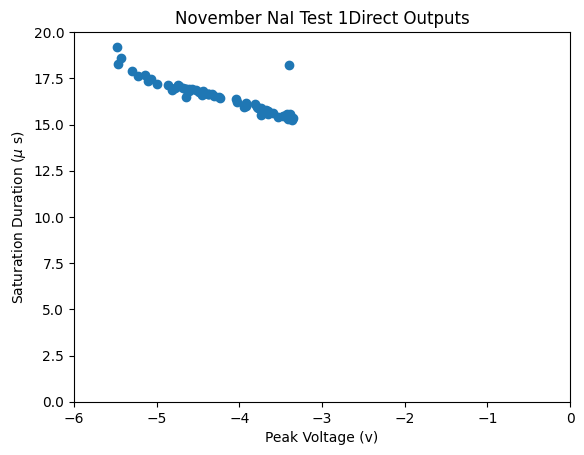

In [54]:
satdurationlist = []
returnbaselinelist = []
outliers = []
peakvoltagelist = []
directory = r"C:\Users\kayli\OneDrive\Documents\COSI\NaI_Test7_two_outputs_direct-20241205T014640Z-001\NaI_Test7_two_outputs_direct_csvs"
# data = pd.read_csv(r"C:\Users\kayli\OneDrive\Documents\COSI\picoscope_background_checks_50us_div-20241009T221601Z-001\picoscope_background_checks_50us_div\20240718_record_check (38).csv")
for file in os.listdir(directory):
    if file.endswith(".csv"):
        filename = os.path.join(file)
        data = pd.read_csv(directory+'/'+file, low_memory = False)
        data = data.iloc[1:]
        data.replace([np.inf, -np.inf], np.nan, inplace=True)

        clean_data = data   
        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('∞', np.nan)
        clean_data['Channel B'] = clean_data['Channel B'].replace('∞', np.nan)

        clean_data['Time'] = clean_data['Time'].replace('∞', np.nan)
        clean_data['Channel A'] = clean_data['Channel A'].replace('-∞', np.nan)
        clean_data['Channel B'] = clean_data['Channel B'].replace('-∞', np.nan)

        clean_data['Time'] = clean_data['Time'].astype(float)
        clean_data['Channel A'] = clean_data['Channel A'].astype(float)
        clean_data['Channel B'] = clean_data['Channel B'].astype(float)

        #checking to see if there is a jump
        if (clean_data['Channel B'] < -1.49).any():
            print(filename, "has a saturation event")

            signal = clean_data["Channel B"]
            time = clean_data["Time"]
            saturation_mask = signal < -1.4
            saturation_start = time[saturation_mask].iloc[0]
            saturation_end = time[saturation_mask].iloc[-1]
            saturation_duration = saturation_end - saturation_start

            peakvoltage = clean_data["Channel A"].min()

            if saturation_duration < 100:
                satdurationlist.append(saturation_duration)
                peakvoltagelist.append(peakvoltage)
                
number = len(satdurationlist)
print("number of data ponts", number)
plt.scatter(peakvoltagelist, satdurationlist)
plt.xlim(-6,0)
plt.ylim(0,20)
plt.ylabel("Saturation Duration ($\mu$ s)")
plt.xlabel("Peak Voltage (v)")
plt.title("November NaI Test 1Direct Outputs")